In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Input 

Using TensorFlow backend.


In [2]:
# loading data
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# normalization in range 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

In [0]:
# reshape
aspet_ratio = 28
x_train = np.reshape(x_train, (len(x_train), aspet_ratio, aspet_ratio, 1))
x_test = np.reshape(x_test, (len(x_test), aspet_ratio, aspet_ratio, 1))

In [0]:
# adding noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 


In [0]:
# clip to be in (low_limit, upper_limit)
low_limit = 0.0
upper_limit = 1.0
x_train_noisy = np.clip(x_train_noisy, low_limit, upper_limit)
x_test_noisy = np.clip(x_test_noisy, low_limit, upper_limit)

In [0]:
input_img = Input(shape=(aspet_ratio, aspet_ratio, 1))

def build_encoding_layers(input_img):
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    return encoded

def build_decoding_layers(encoding_layers):
    x = Conv2D(32, (3, 3), activation = 'relu', padding='same')(encoding_layers)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation = 'relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')(x)
    return decoded


In [0]:
#Making set of pictures with and without noise
encoded = build_encoding_layers(input_img)
decoded = build_decoding_layers(encoded)


In [0]:
#Creating model
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [16]:
#Fitting
autoencoder.fit(x_train_noisy, x_train, epochs=1, shuffle=True)

Epoch 1/1
60000/60000 [==============================] - 148s 2ms/step - loss: 0.1341


In [0]:
#Predicting test 
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = autoencoder.predict(x_test_noisy)

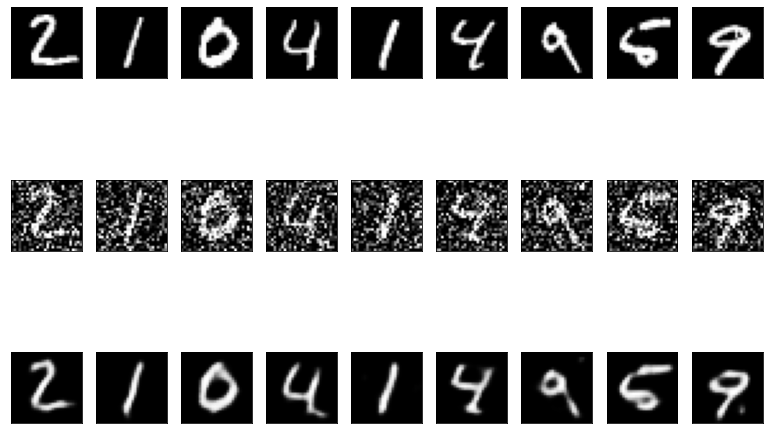

In [18]:
#Visualization
def visualize(images, amount, total_rows, current_row, new_shape, figsize=None):
    for i in range(1, amount):
        if figsize is not None: plt.figure(figsize=figsize)
        ax1 = plt.subplot(total_rows, amount, i + amount*current_row)
        plt.imshow(images[i].reshape(new_shape))
        plt.gray()
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)

amount = 10
plt.figure(figsize=(15, 9))
visualize(images= x_test,       amount= amount, total_rows= 3, current_row= 0, new_shape= (aspet_ratio, aspet_ratio))
visualize(images= x_test_noisy, amount= amount, total_rows= 3, current_row= 1, new_shape= (aspet_ratio, aspet_ratio))
visualize(images= decoded_imgs, amount= amount, total_rows= 3, current_row= 2, new_shape= (aspet_ratio, aspet_ratio))
plt.show()






